In [948]:
import requests
import pandas as pd
import numpy as np
import os
import json
import time
import math
import polyline



In [35]:
ncr = pd.read_csv('/Users/dftdatascience/Desktop/ev-charge-planner/flask/NCR.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
# count chargers at each
charger_cols = ['connector1RatedOutputKW'
'connector2RatedOutputKW'
'connector3RatedOutputKW'
'connector4RatedOutputKW'
'connector5RatedOutputKW'
'connector6RatedOutputKW'
'connector7RatedOutputKW'
'connector8RatedOutputKW']


ncr['chargers_count'] = np.select(
    [
        ncr['connector8RatedOutputKW'] > 0.1, 
        ncr['connector7RatedOutputKW'] > 0.1, 
        ncr['connector6RatedOutputKW'] > 0.1, 
        ncr['connector5RatedOutputKW'] > 0.1, 
        ncr['connector4RatedOutputKW'] > 0.1, 
        ncr['connector3RatedOutputKW'] > 0.1, 
        ncr['connector2RatedOutputKW'] > 0.1, 
        ncr['connector1RatedOutputKW'] > 0.1
        ### add greater than.... 
    ], 
    [
        8,
        7,
        6,
        5,
        4,
        3,
        2,
        1
    ], 
    default=0
)



In [38]:
ncr.to_csv('/Users/dftdatascience/Desktop/ev-charge-planner/flask/NCR_charger_counts.csv')

<AxesSubplot:>

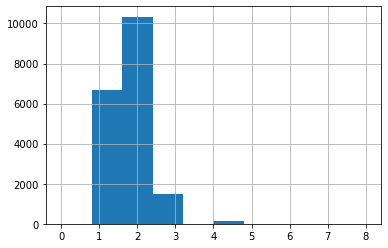

In [18]:
# view number of chargers
ncr['chargers_count'].hist()

<AxesSubplot:>

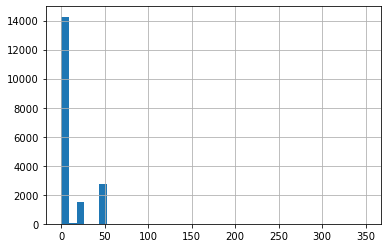

In [22]:
# view fastest connectior kw
ncr['FastestConnector_kW'].hist(bins=40)

In [23]:
ncr.head()

,chargeDeviceID,name,latitude,longitude,subBuildingName,buildingName,buildingNumber,thoroughfare,street,doubleDependantLocality,...,connector1RatedOutputKW,connector2RatedOutputKW,connector3RatedOutputKW,connector4RatedOutputKW,connector5RatedOutputKW,connector6RatedOutputKW,connector7RatedOutputKW,connector8RatedOutputKW,FastestConnector_kW,chargers_count
0,cfeedcdd5e287bef4b583158a12363f1,2 Riddons Road,51.431454,0.031175,NaN,NaN,NaN,Riddons Road,Junction with Chinbrook Road,NaN,...,3.7,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2
1,cf164e398bebd2384cbbbfe73fa72fcf,9 Bath Road Car Park,51.480920,-0.419318,NaN,NaN,9,Bath Road,NaN,Hounslow,...,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,3
2,e2f964e176efb40969652e3249023645,ACE Cafe London,51.541210,-0.277943,NaN,ACE Cafe London,NaN,North Circular Road,Brent,NaN,...,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2
3,451bf16fff6233cca8d9ad69b31c33b9,Albemarle Street,51.509939,-0.142737,NaN,NaN,NaN,Albemarle Street,NaN,NaN,...,3.7,3.7,7.0,7.0,0.0,0.0,0.0,0.0,7.0,4
4,9165d83699e3d014274f4737d169a2a0,Alcorn Close,51.378520,-0.202034,NaN,NaN,30,Alcorn Close,NaN,NaN,...,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2


In [34]:
## aggregating by postcode
print(ncr.shape)

ff = ncr.drop_duplicates(subset='latitude')
print(ff.shape)

ff = ncr.drop_duplicates(subset=['longitude'])
print(ff.shape)

ff = ncr.drop_duplicates(subset=['longitude', 'latitude'])
print(ff.shape)

ff = ncr.drop_duplicates(subset=['postcode'])
print(ff.shape)


(18651, 33)
(14800, 33)
(14641, 33)
(15293, 33)
(10129, 33)


In [45]:
# aggregating by postcode
place_name = ncr['name'].groupby(ncr_by_postcode['postcode']).first()
subBuildingName = ncr['subBuildingName'].groupby(ncr_by_postcode['postcode']).first()
buildingName = ncr['buildingName'].groupby(ncr_by_postcode['postcode']).first()
buildingNumber = ncr['buildingNumber'].groupby(ncr_by_postcode['postcode']).first()
thoroughfare = ncr['thoroughfare'].groupby(ncr_by_postcode['postcode']).first()
street = ncr['street'].groupby(ncr_by_postcode['postcode']).first()
town = ncr['town'].groupby(ncr_by_postcode['postcode']).first()
postcode = ncr['postcode'].groupby(ncr_by_postcode['postcode']).first()
fastest_connector = ncr['FastestConnector_kW'].groupby(ncr_by_postcode['postcode']).max()
total_connectors = ncr['chargers_count'].groupby(ncr['postcode']).sum()
latitude = ncr['latitude'].groupby(ncr['postcode']).mean()
longitude = ncr['longitude'].groupby(ncr['postcode']).mean()


<AxesSubplot:>

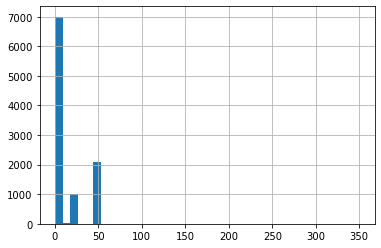

In [82]:
df['FastestConnector_kW'].hist(bins=40)

In [61]:
# appending values to dataframe
df = pd.concat([place_name, subBuildingName, buildingName, buildingNumber, thoroughfare,
            street, town, postcode, fastest_connector, total_connectors, latitude, longitude], axis=1)



In [84]:
# 
df.head()



,name,subBuildingName,buildingName,buildingNumber,thoroughfare,street,town,postcode,FastestConnector_kW,chargers_count,latitude,longitude
postcode,,,,,,,,,,,,
CR0 1BF,South End,None,None,None,None,South End,Croydon,CR0 1BF,22.0,4,51.366336,-0.099005
CR7 7JR,Frant Road,None,None,None,None,Frant Road,Croydon,CR7 7JR,7.0,4,51.394708,-0.110724
20:00,Public estate,07:00,20:00,07:00,20:00,07:00,20:00,20:00,0.0,0,NaN,0.000000
AB10 1AB,"Marischal College, Aberdeen (1)",None,None,None,Broad Street,None,Aberdeen,AB10 1AB,7.0,4,57.149762,-2.095643
AB10 1LU,"Gallowgate, Aberdeen (1)",None,None,None,Gallowgate,Gallowgate,Aberdeen,AB10 1LU,50.0,5,57.150830,-2.098296


In [78]:
# saving
df.to_csv('/Users/dftdatascience/Desktop/ev-charge-planner/flask/NCR_aggregated_to_postcode.csv')

In [88]:
# viewing connector speed
df['FastestConnector_kW'].value_counts()

7.0      3621
3.7      3208
50.0     2073
22.0      992
3.0       170
11.0       32
175.0      10
36.0        8
120.0       6
350.0       4
0.0         3
150.0       1
Name: FastestConnector_kW, dtype: int64

In [90]:
# filtering for fastest connectors being over 49KwH
df_faster_connectors = df[df['FastestConnector_kW'] > 49]
print(df_faster_connectors.shape)
df_faster_connectors.to_csv('/Users/dftdatascience/Desktop/ev-charge-planner/flask/NCR_agg_postcode_filtered_kw.csv')

(2094, 12)


In [941]:
ratings = pd.read_csv('ratings.csv')
ratings.head()




,postcode,name,subBuildingName,buildingName,buildingNumber,thoroughfare,street,town,postcode.1,FastestConnector_kW,chargers_count,latitude,longitude,rating
0,AB10 1LU,"Gallowgate, Aberdeen (1)",NaN,NaN,NaN,Gallowgate,Gallowgate,Aberdeen,AB10 1LU,50.0,5,57.150830,-2.098296,4.550000
1,AB10 7BA,Aberdeen Snowsports Centre,NaN,NaN,77,Garthdee Road,NaN,Aberdeen,AB10 7BA,50.0,3,57.121661,-2.126124,2.333333
2,AB10 7LN,"Broomhill Road, Aberdeen",NaN,NaN,287,Broomhill Road,NaN,Aberdeen,AB10 7LN,50.0,3,57.136221,-2.115193,3.250000
3,AB12 3JG,Specialist Cars Aberdeen - Nissan,NaN,SHELL REDMOSS,NaN,NaN,Balmoral Business Park,Aberdeen,AB12 3JG,50.0,5,57.109004,-2.095848,2.750000
4,AB21 9LZ,Lidl - Bucksburn,NaN,NaN,NaN,NaN,Inverurie Road,Aberdeen,AB21 9LZ,50.0,3,57.179293,-2.176260,2.750000


In [79]:
##### take sample
sample_ncr = df.sample(n=200, replace=False, random_state=1)
sample_ncr = sample_ncr[['latitude', 'longitude', 'FastestConnector_kW', 'chargers_count']]
print(sample_ncr.shape)

(200, 4)


In [390]:
### input stats from user
latlong_first=(0.1278, 51.5074)
latlong_destination=(-1.6178, 54.9783)
speed_comfort=0.6
ev_charge_speed=450
max_range=150
battery_size=93.4

In [251]:
sample_ncr.head()

,latitude,longitude,FastestConnector_kW,chargers_count,lat_long
postcode,,,,,
SE15 5HW,51.471632,-0.066631,3.7,1,"-0.066631,51.471632"
W12 7BB,51.507640,-0.231780,3.7,1,"-0.23178,51.50764"
DN5 0EW,53.551067,-1.147305,50.0,3,"-1.147305,53.551067"
IV7 8JU,57.628699,-4.257912,7.0,2,"-4.257912,57.628699"
W1H 5HY,51.517638,-0.163856,3.7,1,"-0.163856,51.517638"


In [92]:
sample_ncr.dtypes

latitude               float64
longitude              float64
FastestConnector_kW    float64
chargers_count           int64
dtype: object

In [252]:
# adding concatenated column 
sample_ncr['lat_long'] = sample_ncr['latitude'].astype('str') + ',' + sample_ncr['longitude'].astype('str')
sample_ncr['lat_long'] = sample_ncr['longitude'].astype('str') + ',' + sample_ncr['latitude'].astype('str')

sample_ncr.head()


,latitude,longitude,FastestConnector_kW,chargers_count,lat_long
postcode,,,,,
SE15 5HW,51.471632,-0.066631,3.7,1,"-0.066631,51.471632"
W12 7BB,51.507640,-0.231780,3.7,1,"-0.23178,51.50764"
DN5 0EW,53.551067,-1.147305,50.0,3,"-1.147305,53.551067"
IV7 8JU,57.628699,-4.257912,7.0,2,"-4.257912,57.628699"
W1H 5HY,51.517638,-0.163856,3.7,1,"-0.163856,51.517638"


In [396]:
# making OSRM query string
for_query = sample_ncr['lat_long'][:97]
latlong_text_for_query = for_query.str.cat(sep=';')

In [397]:
# adding start and destination points
# latlong_first
latlong_first_string = ','.join([str(x) for x in latlong_first])
latlong_destination_string = ','.join([str(x) for x in latlong_destination])
print(latlong_first_string)
print(latlong_destination_string)

0.1278,51.5074
1.6178,54.9783


In [398]:
full_query_text = '0.0.0.0:5000/table/v1/driving/' + latlong_first_string + ';' + latlong_destination_string + ';' +latlong_text_for_query
full_query_text

'0.0.0.0:5000/table/v1/driving/0.1278,51.5074;1.6178,54.9783;-0.066631,51.471632;-0.23178,51.50764;-1.147305,53.551067;-4.257912,57.628699;-0.163856,51.517638;-0.18380342857142856,51.116901857142864;-0.526424,52.025932499999996;-0.017642,51.585331;-0.47859850000000004,52.1122345;-0.14007,51.518602;-0.194467,51.517064;-0.278134,51.564362;-0.160699,51.464208;-1.355457,50.925815;-4.214732,55.93718;-2.532173,53.490168;-1.317208,52.076932;-0.140151,51.523643;-0.336516,51.581872;-0.14607399999999998,51.572894;-4.071882,50.390999;-0.218401,51.47282;-1.85969,53.72722;-0.174,50.834;-0.291509,51.470404;-1.745023,54.713454;-0.188547,51.486173;-0.195314,51.50558;-1.47262,53.360998;-2.608084,51.460156;-0.184985,51.491823;-0.21311750000000002,51.461778;-0.2544,51.513984;-0.592181,51.510645;-0.21457,51.490183;-0.243637,51.503346;-0.192513,51.518229;-1.061004,50.795488;1.2800476666666667,52.059048;-3.576534,51.534361;-1.503936,52.217793;-3.334746,57.721317;-0.181651,51.693485;-0.163056,51.549358;-1.21

In [399]:
# make query to OSRM using curl
start_time = time.time()
result = os.popen("curl '" + full_query_text + "'").read()
end_time = time.time()
print(end_time - start_time)

2.635348081588745


In [378]:

#location_df = pd.DataFrame.from_dict(json.loads(result)['durations'])
#location_df[['lat','long']] = pd.DataFrame(location_df.location.tolist(), index= location_df.index)
#location_df = location_df[['lat','long']]

In [379]:
#location_df

In [387]:
#ix = location_df.long==54.9783

#print(len(location_df.sort_values(by='lat')['lat'].tolist()))

#latlong_destination=(54.9783, 1.6178)


200

In [400]:
## process OSRM output to np array
travel_time_matrix = json.loads(result)['durations']
travel_time_matrix = np.asarray(travel_time_matrix)
travel_time_matrix.shape

(99, 99)

In [401]:
# look at the travel time matrix
travel_time_matrix

array([[    0. , 17598.2,  1615.5, ...,  9734.3,  3175.1, 20152.8],
       [17537. ,     0. , 17793.2, ...,  9573.5, 16527.1,  8910.7],
       [ 1630.4, 17829. ,     0. , ...,  9126.4,  1912.2, 20383.6],
       ...,
       [ 9705. ,  9587.3,  9038.4, ...,     0. ,  7692.9, 11867.4],
       [ 3168.8, 16550.5,  1861.2, ...,  7733.2,     0. , 19017.8],
       [19960.6,  8778.6, 20216.8, ..., 11755. , 18896.4,     0. ]])

In [413]:
# get travel distance from start to end if direct route

full_query_text = '0.0.0.0:5000/route/v1/driving/' + latlong_first_string + ';' + latlong_destination_string + '?overview=false'
start_time = time.time()
result = os.popen("curl '" + full_query_text + "'").read()
end_time = time.time()
print(end_time - start_time)

distance_start_to_end_miles = json.loads(result)['routes'][0]['legs'][0]['distance'] / 1600
start_to_end_direct_seconds = json.loads(result)['routes'][0]['legs'][0]['duration']
print(distance_start_to_end_miles)
print(start_to_end_direct_seconds)

0.05782604217529297
240.5699375
17598.2


In [409]:
# getting distances matrix (rather than durations - we need both distances and durations!)
full_query_text_distances = '0.0.0.0:5000/table/v1/driving/' + latlong_first_string + ';' + latlong_destination_string + ';' +latlong_text_for_query + '?annotations=distance'

result = os.popen("curl '" + full_query_text_distances + "'").read()

distance_matrix = json.loads(result)['distances']
distance_matrix = np.asarray(distance_matrix)
distance_matrix = distance_matrix / 1600   # converting from metres to miles
distance_matrix.shape

(99, 99)

In [408]:
distance_matrix[:4,:4]  # view top left

array([[  0.       , 240.8735   ,  10.312625 ,  20.071375 ],
       [241.1078125,   0.       , 223.8403125, 219.539125 ],
       [ 10.6504375, 234.2093125,   0.       ,   9.2604375],
       [ 19.8870625, 220.6801875,   9.280375 ,   0.       ]])

In [944]:
# make up tripadvisor ratings as 2d array
user_review_ratings = np.append(np.zeros(2), np.random.uniform(0, 1, 97))
user_review_ratings

array([0.        , 0.        , 0.50574764, 0.81642686, 0.18251245,
       0.22049658, 0.65292912, 0.79352663, 0.67554649, 0.62664956,
       0.99218098, 0.60877086, 0.12343022, 0.43683725, 0.64375157,
       0.29953955, 0.8466674 , 0.96900966, 0.60629451, 0.00437495,
       0.10982578, 0.44441117, 0.07650087, 0.36101808, 0.54849469,
       0.6518802 , 0.8881903 , 0.09036921, 0.79474424, 0.93241371,
       0.32797576, 0.22368859, 0.03951204, 0.87805526, 0.35688846,
       0.67234611, 0.89964632, 0.98322551, 0.68105232, 0.79868376,
       0.57415641, 0.61078924, 0.60579092, 0.45890295, 0.04505117,
       0.15044288, 0.88747213, 0.01519995, 0.16625841, 0.70165158,
       0.08593224, 0.49817778, 0.66526988, 0.29064876, 0.38264561,
       0.5603951 , 0.08237218, 0.1103282 , 0.39759961, 0.21531457,
       0.86035128, 0.44279991, 0.8733989 , 0.67382671, 0.94876239,
       0.1007692 , 0.40870499, 0.42203836, 0.17145307, 0.55015079,
       0.24086745, 0.77066534, 0.11446062, 0.57002736, 0.70390

In [938]:
# dealing with it if destination is within range of EV
if distance_matrix[0,1] < (max_range*0.95):
    return('<h1>It looks like you can make the journey without stopping to charge! :)</h1>')
    

150

In [ ]:
# Influence of battery fullness on charge speed:
# https://support.fastned.nl/hc/en-gb/articles/205694717-What-determines-the-charge-speed-

# Shows steady rate of charge speed up to 70%, then a rapid dropoff

In [418]:
### Recap all inputs
# travel_time_matrix (n + 2 * n + 2)
# distance_matrix (n + 2 * n + 2)
# user_review_ratings (n+2 * 1)
# speed_comfort=0.6
# ev_charge_speed (kw)=225
# max_range=150
# battery_size (kwh) = 93.4
# distance_start_to_end_miles = float
# start_to_end_direct_seconds = float


In [417]:
### Algo: 
# make likely journey chunks based on EV range and journey distance
# for each chunk: list possible stops for each chunk based on travel distance
# then filter them out if they are more than a certain % of the distance to
# the end (relative to how far the journey would be if doing it in one go, and 
# how far the journey of that chunk would be)
# when chunk 1 is done, looks for all combinations of chunk 1 going to chunk 2
# and filter as appropriate
# then chunk 3, etc

In [419]:
# checking journet can't be made in one go (adding 1.2 factor to adjust for optimism)
if (distance_start_to_end_miles / max_range) < 1.0:
    print('Can make journey in one go, so do something with that!')
    print('make polyline from just this one')


In [421]:
# max number of journey chunks. Using 1.3 multiplier as feels about right (more max
# chunks means higher performance overall, as more combinations are checked, but takes longer)
max_chunks_count = math.ceil((distance_start_to_end_miles * 1.3) / max_range)


In [849]:
# dont want too few chunks or might not work for very long distances
min_chunks_count =  math.ceil((distance_start_to_end_miles * 0.8) / max_range)
min_chunks_count

2

In [427]:

# range of journey chunks in miles, then converting to seconds (seconds is what is actually used)
max_chunk_range_miles = (distance_start_to_end_miles / max_chunks_count) * 1.5 # close to EV max distance
min_chunk_range_miles = (distance_start_to_end_miles / max_chunks_count) * 0.7



In [461]:

# find candidates for first chunk
chunk_candidates = np.where(np.logical_and(distance_matrix[0,:]>=min_chunk_range_miles, distance_matrix[0,:]<=max_chunk_range_miles))
chunk_candidates = chunk_candidates[0]  # gets it to right format
chunk_candidates

(array([ 8, 10, 15, 18, 25, 39, 40, 42, 46, 61, 64, 70, 77, 79, 82, 92, 94]),)


array([ 8, 10, 15, 18, 25, 39, 40, 42, 46, 61, 64, 70, 77, 79, 82, 92, 94])

In [433]:
# use chunk_candidates as ix to get osrm distances
dists_travelled = distance_matrix[chunk_candidates, 0]  # distance from start point to candidate
dists_to_go = distance_matrix[chunk_candidates, 1]    # distance from end point to candidate


array([183.3565   , 175.0666875, 276.9908125, 181.5709375, 299.1444375,
       300.421375 , 238.966    , 177.266125 , 215.4975   , 304.9959375,
       128.1609375, 289.167625 , 264.7726875, 254.734125 , 298.759    ,
       282.2038125, 242.2964375])

In [492]:
# see if candidate is viable

def is_candidate_viable(distance_start_to_end_miles, 
                        distance_travelled_so_far,
                        distance_to_go, 
                       X_factor = 2):
    """returns false if the distance covered is much lower than the total gap closed
    from the start. 
    By a factor of X_factor
    Inputs are for candidate service stations as part of the chunking process"""
    return (distance_travelled_so_far / (distance_start_to_end_miles - distance_to_go)) > X_factor



# line below should return true/false array
to_include_ix = is_candidate_viable(distance_start_to_end_miles, dists_travelled, dists_to_go)
first_chunk_candidates_accepted = chunk_candidates[to_include_ix]

# first chunk step complete



In [954]:
# following chunks: find acceptable points
def find_stops_for_chunk(first_chunk_candidates_accepted,
                        max_chunk_range_miles,
                        min_chunk_range_miles,
                        distance_matrix,
                        distance_start_to_end_miles):
    
    # this doesnt consider direction which could be used to filter more aggresively
    a = distance_matrix[first_chunk_candidates_accepted,:]>=min_chunk_range_miles
    b = distance_matrix[first_chunk_candidates_accepted,:]<=max_chunk_range_miles
    chunk_candidates = np.where((a*b)[0])[0]
    print(chunk_candidates)

    # use chunk_candidates as ix to get osrm distances
    dists_travelled = distance_matrix[chunk_candidates, 0]  # distance from start point to candidate
    dists_to_go = distance_matrix[chunk_candidates, 1]    # distance from end point to candidate

    to_include_ix = is_candidate_viable(distance_start_to_end_miles, dists_travelled, dists_to_go)
    chunk_candidates_accepted = chunk_candidates[to_include_ix]
    
    return chunk_candidates_accepted


find_stops_for_chunk(first_chunk_candidates_accepted, 
                    max_chunk_range_miles,
                    min_chunk_range_miles,
                    distance_matrix,
                    distance_start_to_end_miles)

[10 15 18 25 31 39 40 42 47 57 59 60 61 62 64 70 75 82 86 92 93 96]


array([40, 86])

In [520]:
# process for chunks
def get_candidate_stops_each_chunk(chunks_count,
                                  distance_matrix,
                                  min_chunk_range_miles,
                                  max_chunk_range_miles,
                                  distance_start_to_end_miles):
    
    max_chunk_range_miles = (distance_start_to_end_miles / chunks_count) * 1.5 # for few chunk may exceed EV dist
    min_chunk_range_miles = (distance_start_to_end_miles / chunks_count) * 0.7


    stops_dict_a_chunk = {'chunks_count': chunks_count}

    # get chunk for first stop
    chunk_candidates = np.where(np.logical_and(distance_matrix[0,:]>=min_chunk_range_miles, distance_matrix[0,:]<=max_chunk_range_miles))
    chunk_candidates = chunk_candidates[0]  # gets it to right format

    dists_travelled = distance_matrix[chunk_candidates, 0]  # distance from start point to candidate
    dists_to_go = distance_matrix[chunk_candidates, 1]    # distance from end point to candidate

    to_include_ix = is_candidate_viable(distance_start_to_end_miles, dists_travelled, dists_to_go)
    current_chunk_candidates_accepted = chunk_candidates[to_include_ix]
    stops_dict_a_chunk['chunk1'] = current_chunk_candidates_accepted


    # get chunks for stops 2 and over
    for i in range(2,chunks_count):
        current_chunk_candidates_accepted = find_stops_for_chunk(current_chunk_candidates_accepted, 
                        max_chunk_range_miles,
                        min_chunk_range_miles,
                        distance_matrix,
                        distance_start_to_end_miles)

        stops_dict_a_chunk['chunk' + str(i)] = current_chunk_candidates_accepted

    return stops_dict_a_chunk

In [521]:
# looping through chunk counts to get all possible chunks
all_chunk_candidates_dict = {}
for chunks_count in range(2, max_chunks_count+1):

    all_chunk_candidates_dict[chunks_count] = get_candidate_stops_each_chunk(chunks_count,
                                      distance_matrix,
                                      min_chunk_range_miles,
                                      max_chunk_range_miles,
                                      distance_start_to_end_miles)

In [522]:
all_chunk_candidates_dict

{2: {'chunks_count': 2, 'chunk1': array([84, 86])},
 3: {'chunks_count': 3,
  'chunk1': array([40, 46]),
  'chunk2': array([35, 54, 84])}}

In [859]:
# storing arrays of all possible values in a dict
all_possibilities_dict = {}


# for 1-stop
vals = all_chunk_candidates_dict[2]['chunk1']
all_possibilities_dict['one_chunk'] = np.array(np.meshgrid([0], vals, [1])).T.reshape(-1,3)
# adding 1 columns
for i in range(2, max_chunks_count):
    all_possibilities_dict['one_chunk'] = np.c_[ all_possibilities_dict['one_chunk'], np.ones(len(all_possibilities_dict['one_chunk'] )) ]   

# for 2 stops
if max_chunks_count >= 3:
    vals = all_chunk_candidates_dict[3]['chunk1']
    vals2 = all_chunk_candidates_dict[3]['chunk2']
    all_possibilities_dict['two_chunk'] = np.array(np.meshgrid([0], vals, vals2, [1])).T.reshape(-1, 4)
    for i in range(3, max_chunks_count):
        all_possibilities_dict['one_chunk'] = np.c_[ all_possibilities_dict['one_chunk'], np.ones(len(all_possibilities_dict['one_chunk'] )) ]   


# 3 stops 
if max_chunks_count >= 4:
    vals = all_chunk_candidates_dict[4]['chunk1']
    vals2 = all_chunk_candidates_dict[4]['chunk2']
    vals3 = all_chunk_candidates_dict[4]['chunk3']
    all_possibilities_dict['three_chunk'] = np.array(np.meshgrid([0], vals, vals2,vals3, [1])).T.reshape(-1, 5)
    for i in range(4, max_chunks_count):
        all_possibilities_dict['one_chunk'] = np.c_[ all_possibilities_dict['one_chunk'], np.ones(len(all_possibilities_dict['one_chunk'] )) ]   

    
# 4 stops
if max_chunks_count >= 5:
    vals = all_chunk_candidates_dict[5]['chunk1']
    vals2 = all_chunk_candidates_dict[5]['chunk2']
    vals3 = all_chunk_candidates_dict[5]['chunk3']
    vals4 = all_chunk_candidates_dict[5]['chunk4']
    all_possibilities_dict['four_chunk'] = np.array(np.meshgrid([0], vals, vals2,vals3,vals4 [1])).T.reshape(-1, 6)
    for i in range(5, max_chunks_count):
        all_possibilities_dict['one_chunk'] = np.c_[ all_possibilities_dict['one_chunk'], np.ones(len(all_possibilities_dict['one_chunk'] )) ]   

    
if max_chunks_count >= 6:
    print('sorry,not set up for 5 stops or more :(')

In [860]:
all_possibilities_dict

{'one_chunk': array([[ 0., 84.,  1.,  1.],
        [ 0., 86.,  1.,  1.]]),
 'two_chunk': array([[ 0, 40, 35,  1],
        [ 0, 46, 35,  1],
        [ 0, 40, 54,  1],
        [ 0, 46, 54,  1],
        [ 0, 40, 84,  1],
        [ 0, 46, 84,  1]])}

In [861]:
# remove chunks which fall below the min_chunks_count
min_chunks_count_counter = min_chunks_count

lookup_dict = {3:'one', 4:'two', 5:'three', 6:'four', 7:'five'}

while min_chunks_count_counter >= 3:
    key_to_pop = lookup_dict[min_chunks_count_counter] + '_chunk'
    all_possibilities_dict.pop(key_to_pop, None)
    
    min_chunks_count_counter = min_chunks_count_counter - 1


{'one_chunk': array([[ 0., 84.,  1.,  1.],
        [ 0., 86.,  1.,  1.]]),
 'two_chunk': array([[ 0, 40, 35,  1],
        [ 0, 46, 35,  1],
        [ 0, 40, 54,  1],
        [ 0, 46, 54,  1],
        [ 0, 40, 84,  1],
        [ 0, 46, 84,  1]])}

In [588]:
# convert dict into single array
journeys = all_possibilities_dict['one_chunk']
for key in all_possibilities_dict.keys():
    if key != 'one_chunk':
        journeys = np.r_[ journeys,all_possibilities_dict[key] ] 

journeys = journeys.astype('int')
journeys[:4,:4]

array([[ 0, 84,  1,  1],
       [ 0, 86,  1,  1],
       [ 0, 40, 35,  1],
       [ 0, 46, 35,  1]])

In [742]:
# get array input for journey times up to 5 journeys (4 stops). Empty will be 1's as 1 is endpoint
journey_times = np.zeros((journeys.shape[0], journeys.shape[1] - 1))
for i in range(journey_times.shape[1]):
    journey_times[:,i] = travel_time_matrix[journeys[:, i], journeys[:, i+1]]

journey_times

array([[10265.6, 15494.6,     0. ],
       [11063.9, 16835.9,     0. ],
       [ 5753.1,  7764. , 16764.6],
       [ 6941.4,  3152.9, 16764.6],
       [ 5753.1,  6404.7, 15378.1],
       [ 6941.4,  3591.4, 15378.1],
       [ 5753.1,  5997.2, 15494.6],
       [ 6941.4, 12378.6, 15494.6]])

In [647]:
journey_distances = np.zeros((journeys.shape[0], journeys.shape[1] - 1))
for i in range(journey_distances.shape[1]):
    journey_distances[:,i] = distance_matrix[journeys[:, i], journeys[:, i+1]]

journey_distances.shape

(8, 3)

In [665]:
# calc charging times using NCR and car kW 

# original data gets made from sample_ncr. Will change to fit algo 1's contribution
a = np.asarray([99999999,99999999]).astype('int')
b = np.asarray(sample_ncr.FastestConnector_kW[:97]).astype('int')
charge_speeds = np.concatenate([a, b])
charge_speeds = np.minimum(charge_speeds, [ev_charge_speed])  # accounting for car charging speed




In [743]:
# matrix of charging speeds
charge_speeds_all_stops = np.zeros((journeys.shape[0], journeys.shape[1] - 2))
for i in range(charge_speeds_all_stops.shape[0]):
    for j in range(charge_speeds_all_stops.shape[1]):
        charge_speeds_all_stops[i,j] = charge_speeds[ journeys[i, j+1]]

charge_speeds_all_stops

array([[ 50., 450.],
       [ 50., 450.],
       [  7.,  50.],
       [  3.,  50.],
       [  7.,   7.],
       [  3.,   7.],
       [  7.,  50.],
       [  3.,  50.]])

In [744]:
charge_times_all_stops = np.zeros((journeys.shape[0], journeys.shape[1] - 2))

for stop_count in range(1, charge_speeds_all_stops.shape[1]+1):
    print(stop_count)
    charge_left = np.maximum(max_range - journey_distances[:,stop_count-1], [0])
    charge_needed = np.maximum(journey_distances[:,stop_count] - charge_left, [0])
    hours_to_charge = (charge_needed / max_range) * battery_size / charge_speeds_all_stops[:,stop_count-1]
    charge_times_all_stops[:, stop_count-1] = hours_to_charge

1
2


In [745]:
# niceness
quality_all_stops = np.zeros((journeys.shape[0], journeys.shape[1] - 2))

for stop_count in range(1, charge_speeds_all_stops.shape[1]+1):
    quality_all_stops[:,stop_count-1] = user_review_ratings[journeys[:, stop_count]]

In [749]:
# journey-level stats for final calculation
journey_niceness_weighted_avg = np.average(quality_all_stops, axis=1, weights=charge_times_all_stops)
total_charge_time = np.sum(charge_times_all_stops, axis= 1)
total_journey_time = np.sum(journey_times, axis= 1) / 3600



In [826]:
# overall scores: is sensitive to the multiplier below
sensitive_multiplier=3
score = (total_charge_time*journey_niceness_weighted_avg*speed_comfort*sensitive_multiplier)-total_journey_time-total_charge_time 
best_journey_pos = np.argmax(score)
best_journey = journeys[best_journey_pos]


In [812]:
latlong_first
latlong_destination

(1.6178, 54.9783)

In [813]:
# formatting for start/end too
to_add = pd.DataFrame({'name': ['start', 'end'],
             'latitude': [latlong_first[1], latlong_destination[1]],
                      'longitude': [latlong_first[0], latlong_destination[0]]})
to_add

,name,latitude,longitude
0,start,51.5074,0.1278
1,end,54.9783,1.6178


In [814]:
# extracting winning journey coords and service stat names
sample_ncr['name'] = 'aaa'
sample_ncr2 = to_add.append(sample_ncr[['name', 'latitude','longitude']])

output_results = sample_ncr2.iloc[best_journey,]
output_results

,name,latitude,longitude
0,start,51.507400,0.127800
OX4 2ED,aaa,51.738103,-1.214844
NR28 0AW,aaa,52.830692,1.382878
1,end,54.978300,1.617800


In [816]:
# get polylines for winning journey
polyline_dict = {}
for i in range(len(output_results)-1):
    pair1 = output_results.iloc[i,:]['longitude'].astype('str') + ',' + output_results.iloc[i,:]['latitude'].astype('str')
    pair2 = output_results.iloc[i+1,:]['longitude'].astype('str') + ',' + output_results.iloc[i+1,:]['latitude'].astype('str')
    
    url_for_polylines = '0.0.0.0:5000/route/v1/car/' + pair1 + ';' + pair2
    response = os.popen("curl '" + url_for_polylines + "'").read()
    json_data = json.loads(response)
    poly_out = json_data["routes"][0]["geometry"]
    polyline_dict[i] = polyline.decode(poly_out)    # polyline to coordinates


In [878]:
polyline_array = []
keys = polyline_dict.keys()
for key in polyline_dict:
    polyline_array.extend(polyline_dict[key])

0
1
2


In [892]:
destination_names = output_results.name[1:len(output_results)-1]
destination_names.reset_index(drop=True, inplace=True)
destination_names  = destination_names.tolist()
pcodes = output_results.index[1:len(output_results)-1]
pcodes = pcodes.tolist()



In [882]:
#### outputs
polyline_array
output_results   # table of results
hrs_driving = total_journey_time[best_journey_pos]
total_miles = np.sum(journey_distances, axis=1)[best_journey_pos]
time_charging = total_charge_time[best_journey_pos]
journey_niceness = journey_niceness_weighted_avg[best_journey_pos]



In [897]:
marker_coords = list(zip(output_results.latitude, output_results.longitude))
marker_coords = [list(x) for x in marker_coords]
marker_coords

[[51.5074, 0.1278],
 [51.738103, -1.214844],
 [52.830692, 1.382878],
 [54.9783, 1.6178]]

In [902]:
place_names = output_results.name.tolist()
place_names

['start', 'aaa', 'aaa', 'end']

In [906]:
temp_vals = {'polyline_array': polyline_array,
            'output_results':output_results,
             'destination_names': destination_names,
             'pcodes': pcodes,
             'place_names':place_names,
            'hrs_driving': hrs_driving,
            'total_miles': total_miles,
            'time_charging':time_charging,
            'journey_niceness': journey_niceness,
            'marker_coords': marker_coords} 

np.save('/Users/dftdatascience/Desktop/ev-charge-planner/flask/dummy_output.npy', temp_vals) 



In [870]:
output_results[1:len(output_results)-1:]['name'].index

'OX4 2ED'

In [905]:
journey_niceness

0.7139376400030314

In [955]:
x = pd.read_csv('/Users/dftdatascience/Desktop/ev-charge-planner/flask/sample_ncr_created.csv')

In [956]:
x.head()

    

,Unnamed: 0,latitude,longitude,rating,name,FastestConnector_kW
0,86,53.753872,-2.440800,4.350000,Eurogarages - Frontier Park,50.0
1,257,54.798219,-2.870099,4.000000,MO Southwaite Northbound,50.0
2,446,52.935397,-1.464838,4.050000,Bristol Street Motors Nissan Derby 1,50.0
3,484,54.889764,-1.559139,4.000000,MO Washington Northbound,50.0
4,506,53.256707,-0.925256,4.666667,Markham Moor Inn,175.0


In [957]:
x.shape





(59, 6)

In [ ]:
## making smaller postcode/latlong lookup

In [908]:
d = pd.read_csv('ukpostcodes.csv')

In [910]:
d.drop(columns=['id'], inplace=True)

In [917]:
d['longitude'] = d['longitude'].astype('float32')
d['latitude'] = d['latitude'].astype('float32')
d['postcode'] = d.postcode.str.strip()
d['postcode'] = d['postcode'].replace('\s+', ' ', regex=True)

In [933]:
d.reset_index(drop=True, inplace=True)

In [934]:
d.to_parquet('ukpostcodes_processed.parquet')

In [919]:
d.head()

,postcode,latitude,longitude
0,AB10 1XG,57.144165,-2.114848
1,AB10 6RN,57.137878,-2.121487
2,AB10 7JB,57.124275,-2.127190
3,AB11 5QN,57.142700,-2.093295
4,AB11 6UL,57.137547,-2.112233


In [935]:
first_ix = d['postcode'] == 'IP4 5LL'
d.loc[first_ix,'latitude']

941271    52.056999
Name: latitude, dtype: float32

In [977]:
charge_times_all_stops = np.loadtxt('/Users/dftdatascience/Desktop/ev-charge-planner/flask/charge_times_all_stops.csv', delimiter=",")
quality_all_stops = np.loadtxt('/Users/dftdatascience/Desktop/ev-charge-planner/flask/quality_all_stops.csv', delimiter=",")


#np.average(quality_all_stops, axis=1))#, weights=charge_times_all_stops)

quality_all_stops * charge_times_all_stops / np.sum(charge_times_all_stops, axis = 1)[:,None]
x = quality_all_stops * charge_times_all_stops / np.sum(charge_times_all_stops, axis = 1)[:,None]

x.shape

<ipython-input-977-312d456d12c1>:7: RuntimeWarning: invalid value encountered in true_divide
  quality_all_stops * charge_times_all_stops / np.sum(charge_times_all_stops, axis = 1)[:,None]
<ipython-input-977-312d456d12c1>:8: RuntimeWarning: invalid value encountered in true_divide
  x = quality_all_stops * charge_times_all_stops / np.sum(charge_times_all_stops, axis = 1)[:,None]


(761, 2)

In [961]:
charge_times_all_stops

array([[2.69975283, 0.        ],
       [1.95264187, 0.        ],
       [2.40416203, 0.        ],
       ...,
       [0.04931118, 0.87310132],
       [0.10144728, 0.49473583],
       [0.62138397, 0.82615011]])

In [964]:
quality_all_stops

array([[3. , 0. ],
       [3.7, 0. ],
       [4.3, 0. ],
       ...,
       [3.8, 3.8],
       [3.8, 3.8],
       [3.8, 3.8]])

In [ ]:
journey_niceness_weighted_avg